<a href="https://colab.research.google.com/github/comojin1994/Machine_Learning/blob/master/Regression/Multiple_Linear_Regression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#### 현재경로 확인

In [0]:
os.getcwd()

'/Users/sungjinkim/Documents/Study/Machine_Learning'

### 데이터 불러오기

In [0]:
corolla = pd.read_csv('./data/ToyotaCorolla.csv')
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


### 데이터 수와 변수의 수 확인하기

In [0]:
nCar = corolla.shape[0]
nVar = corolla.shape[1]
nCar, nVar

(1436, 37)

## 범주형 변수를 이진형 변수로 변환
### 가변수 생성

In [0]:
corolla.Fuel_Type.unique()

array(['Diesel', 'Petrol', 'CNG'], dtype=object)

In [0]:
dummy_p = np.repeat(0, nCar)
dummy_d = np.repeat(0, nCar)
dummy_c = np.repeat(0, nCar)

dummy_p

array([0, 0, 0, ..., 0, 0, 0])

### 인덱스 슬라이싱 후 (binary = 1) 대입

In [0]:
p_idx = np.array(corolla.Fuel_Type == 'Petrol')
d_idx = np.array(corolla.Fuel_Type == 'Diesel')
c_idx = np.array(corolla.Fuel_Type == 'CNG')

In [0]:
p_idx

array([False, False, False, ...,  True,  True,  True])

In [0]:
dummy_p[p_idx] = 1
dummy_d[d_idx] = 1
dummy_c[c_idx] = 1

In [0]:
dummy_p

array([0, 0, 0, ..., 1, 1, 1])

## 불필요한 변수 제거 및 가변수 추가

In [0]:
Fuel = pd.DataFrame({'Petrol': dummy_p, 'Diesel': dummy_d, 'CNG': dummy_c})
Fuel.head()

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [0]:
corolla_ = corolla.drop(['Id', 'Model', 'Fuel_Type'], axis=1, inplace=False)
mlr_data = pd.concat((corolla_, Fuel), 1)
mlr_data.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0


### bias 추가

In [0]:
mlr_data = sm.add_constant(mlr_data, has_constant='add')
mlr_data.head()

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0


In [0]:
feature_columns = list(mlr_data.columns.difference(['Price']))
feature_columns

['ABS',
 'Age_08_04',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic',
 'Automatic_airco',
 'BOVAG_Guarantee',
 'Backseat_Divider',
 'Boardcomputer',
 'CD_Player',
 'CNG',
 'Central_Lock',
 'Cylinders',
 'Diesel',
 'Doors',
 'Gears',
 'Guarantee_Period',
 'HP',
 'KM',
 'Met_Color',
 'Metallic_Rim',
 'Mfg_Month',
 'Mfg_Year',
 'Mfr_Guarantee',
 'Mistlamps',
 'Petrol',
 'Power_Steering',
 'Powered_Windows',
 'Quarterly_Tax',
 'Radio',
 'Radio_cassette',
 'Sport_Model',
 'Tow_Bar',
 'Weight',
 'cc',
 'const']

## 설명변수(X), 타겟변수(Y) 분리 및 학습데이터와 평가데이터 분할

In [0]:
X = mlr_data[feature_columns]
y = mlr_data.Price
train_x, test_x, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((1005, 37), (431, 37), (1005,), (431,))

### Train the MLR / 회귀모델적합 

In [0]:
full_model = sm.OLS(train_y, train_x)
fitted_full_model = full_model.fit()

### R2가 높고, 대부분의 변수들이 유의

In [0]:
fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     302.0
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:20:15   Log-Likelihood:                -8445.3
No. Observations:                1005   AIC:                         1.696e+04
Df Residuals:                     971   BIC:                         1.713e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -209.5418    140.228     -1.494      0.135    -484.726      65.642
Age_08_04         -113.7276      4.196    -27.107      0.000    -121.961    -105.494
Airbag_1          -265.2904    260.079     -1.020      0.308    -775.672     245.091
Airbag_2           -58.4656    139.312     -0.420      0.675    -331.854     214.923
Airco              237.2408     92.129      2.575      0.010      56.446     418.036
Automatic          434.7338    161.625      2.690      0.007     117.559     751.908
Automatic_airco   2281.4490    212.385     10.742      0.000    1864.663    2698.235
BOVAG_Guarantee    498.3458    138.325      3.603      0.000     226.896     769.796
Backseat_Divider  -202.8268    131.561     -1.542      0.123    -461.003      55.349
Boardcomputer     -312.8206    123.612     -2.531      0.012    -555.398     -70.243
CD_Player          352.7587    106.359      3.317      0.001     144.039     561.478
CNG              -1737.4130    277.076     -6.271      0.000   -2281.150   -1193.676
Central_Lock       -32.3532    148.957     -0.217      0.828    -324.668     259.962
Cylinders           -0.0278      0.003    -11.061      0.000      -0.033      -0.023
Diesel            1751.4880    316.663      5.531      0.000    1130.066    2372.910
Doors               85.2197     43.715      1.949      0.052      -0.567     171.006
Gears               63.3786    213.599      0.297      0.767    -355.790     482.547
Guarantee_Period    56.8433     14.263      3.985      0.000      28.854      84.833
HP                  53.0471      5.840      9.083      0.000      41.587      64.508
KM                  -0.0164      0.001    -12.015      0.000      -0.019      -0.014
Met_Color          -71.9785     79.331     -0.907      0.364    -227.658      83.701
Metallic_Rim       163.4994    100.246      1.631      0.103     -33.224     360.222
Mfg_Month          -83.8382     10.966     -7.646      0.000    -105.357     -62.319
Mfg_Year             2.5222      0.959      2.630      0.009       0.640       4.404
Mfr_Guarantee      252.6405     78.201      3.231      0.001      99.178     406.104
Mistlamps          -11.3199    114.442     -0.099      0.921    -235.902     213.262
Petrol             -14.0819    250.068     -0.056      0.955    -504.818     476.654
Power_Steering     -77.7966    297.036     -0.262      0.793    -660.702     505.109
Powered_Windows    397.4843    150.354      2.644      0.008     102.429     692.540
Quarterly_Tax       12.5939      1.996      6.308      0.000       8.676      16.512
Radio              316.5082   1118.108      0.283      0.777   -1877.677    2510.694
Radio_cassette    -380.9365   1117.536     -0.341      0.733   -2574.000    1812.127
Sport_Model        324.4440     95.575      3.395      0.001     136.886     512.002
Tow_Bar           -103.

## VIF를 통한 다중공선성 확인 

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF_Factor'] = [variance_inflation_factor(mlr_data.values, i) for i in range(mlr_data.shape[1])]
vif['features'] = mlr_data.columns
vif

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,VIF_Factor,features
0,0.000000,const
1,10.953474,Price
2,inf,Age_08_04
3,inf,Mfg_Month
4,inf,Mfg_Year
5,2.400334,KM
6,2.621514,HP
7,1.143778,Met_Color
8,1.121303,Automatic
9,1.258641,cc


### 학습데이터의 잔차 확인 

In [0]:
res = fitted_full_model.resid

### q-q plot, 정규 분포 확인 

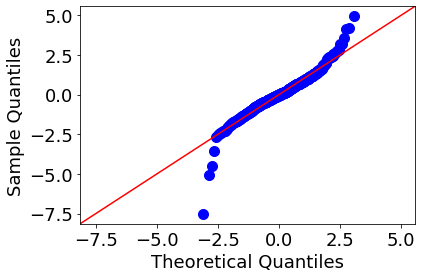

In [0]:
fig = sm.qqplot(res, fit=True, line='45')

### residual pattern 확인 

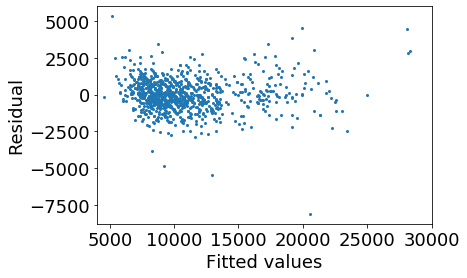

In [0]:
import matplotlib.pyplot as plt
pred_y = fitted_full_model.predict(train_x)

fig = plt.scatter(pred_y, res, s=4)
plt.xlim(4000, 30000)
plt.xlabel('Fitted values')
plt.ylabel('Residual')
plt.show()

### 검증 데이터에 대한 예측 

In [0]:
pred_y2 = fitted_full_model.predict(test_x)

### 잔차 plot 

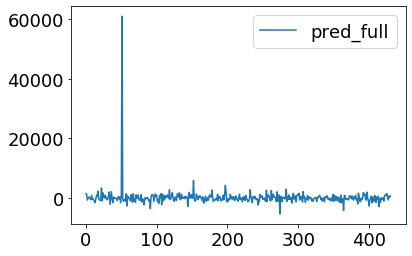

In [0]:
plt.plot(np.array(test_y - pred_y2), label='pred_full')
plt.legend()
plt.show()

In [0]:
from sklearn.metrics import mean_squared_error

### MSE 성능 

In [0]:
mean_squared_error(y_true= test_y, y_pred = pred_y2)

9810928.225452933

## 변수선택법

In [0]:
def processSubset(X, y, feature_set):
    model = sm.OLS(y, X[list(feature_set)])
    regr = model.fit()
    AIC = regr.aic
    return {'model': regr, 'AIC': AIC}

print(processSubset(X=train_x, y=train_y, feature_set=feature_columns[0:5]))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a29030dd0>, 'AIC': 19071.921380438915}


In [0]:
processSubset(X=train_x, y=train_y, feature_set=feature_columns)

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x1a29030290>,
 'AIC': 16958.510221092594}

In [0]:
import time, itertools

# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X, y, k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo = (list(combo) + ['const'])
        
        results.append(processSubset(X, y, feature_set=combo)) # 모델링된 것들을 저장
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print('Processed', models.shape[0], 'models on', k, 'predictors in', (toc - tic), 'seconds')
    return best_model

print(getBest(X=train_x, y=train_y, k=2))

Processed 630 models on 2 predictors in 0.7537069320678711 seconds
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                17572.2
Name: 211, dtype: object


In [0]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
        print(list(combo) + ['const'])

['ABS', 'Age_08_04', 'const']
['ABS', 'Airbag_1', 'const']
['ABS', 'Airbag_2', 'const']
['ABS', 'Airco', 'const']
['ABS', 'Automatic', 'const']
['ABS', 'Automatic_airco', 'const']
['ABS', 'BOVAG_Guarantee', 'const']
['ABS', 'Backseat_Divider', 'const']
['ABS', 'Boardcomputer', 'const']
['ABS', 'CD_Player', 'const']
['ABS', 'CNG', 'const']
['ABS', 'Central_Lock', 'const']
['ABS', 'Cylinders', 'const']
['ABS', 'Diesel', 'const']
['ABS', 'Doors', 'const']
['ABS', 'Gears', 'const']
['ABS', 'Guarantee_Period', 'const']
['ABS', 'HP', 'const']
['ABS', 'KM', 'const']
['ABS', 'Met_Color', 'const']
['ABS', 'Metallic_Rim', 'const']
['ABS', 'Mfg_Month', 'const']
['ABS', 'Mfg_Year', 'const']
['ABS', 'Mfr_Guarantee', 'const']
['ABS', 'Mistlamps', 'const']
['ABS', 'Petrol', 'const']
['ABS', 'Power_Steering', 'const']
['ABS', 'Powered_Windows', 'const']
['ABS', 'Quarterly_Tax', 'const']
['ABS', 'Radio', 'const']
['ABS', 'Radio_cassette', 'const']
['ABS', 'Sport_Model', 'const']
['ABS', 'Tow_Bar', 'con

### 변수 선택에 따른 학습시간과 저장

In [0]:
models = pd.DataFrame(columns=['AIC', 'model'])
tic = time.time()
for i in range(1, 4):
    models.loc[i] = getBest(X=train_x, y=train_y, k=i)
toc = time.time()
print('Total elapsed time:', (toc-tic), 'seconds')

Processed 36 models on 1 predictors in 0.07797789573669434 seconds
Processed 630 models on 2 predictors in 0.8461568355560303 seconds
Processed 7140 models on 3 predictors in 8.025434970855713 seconds
Total elapsed time: 9.083807945251465 seconds


In [0]:
models

,AIC,model
1,17844.642179,<statsmodels.regression.linear_model.Regressio...
2,17572.172682,<statsmodels.regression.linear_model.Regressio...
3,17379.861300,<statsmodels.regression.linear_model.Regressio...


In [0]:
models.loc[3, 'model'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1994.
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:20:26   Log-Likelihood:                -8685.9
No. Observations:                1005   AIC:                         1.738e+04
Df Residuals:                    1001   BIC:                         1.740e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
KM            -0.0243      0.001    -17.290      0.000      -0.027      -0.022
Mfg_Year    1425.7114     39.029     36.530      0.000    1349.124    1502.299
Weight        20.6482      0.965     21.406      0.000      18.755      22.541
const      -2.861e+06   7.75e+04    -36.891      0.000   -3.01e+06   -2.71e+06
==============================================================================
Omnibus:                      227.642   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3128.695
Skew:                          -0.627   Prob(JB):                         0.00
Kurtosis:                      11.552   Cond. No.                     1.41e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 모든 변수들 모델링 한것과 비교 

In [0]:
print('full model Rsquared: ', '{:.5f}'.format(fitted_full_model.rsquared))
print('full model AIC: ', '{:.5f}'.format(fitted_full_model.aic))
print('selected model Rsquared: ', '{:.5f}'.format(models.loc[3, 'model'].rsquared))
print('selected model AIC: ', '{:.5f}'.format(models.loc[3, 'model'].aic))

full model Rsquared:  0.91121
full model AIC:  16958.51022
selected model Rsquared:  0.85665
selected model AIC:  17379.86130


### Plot the result 

Text(0, 0.5, 'BIC')

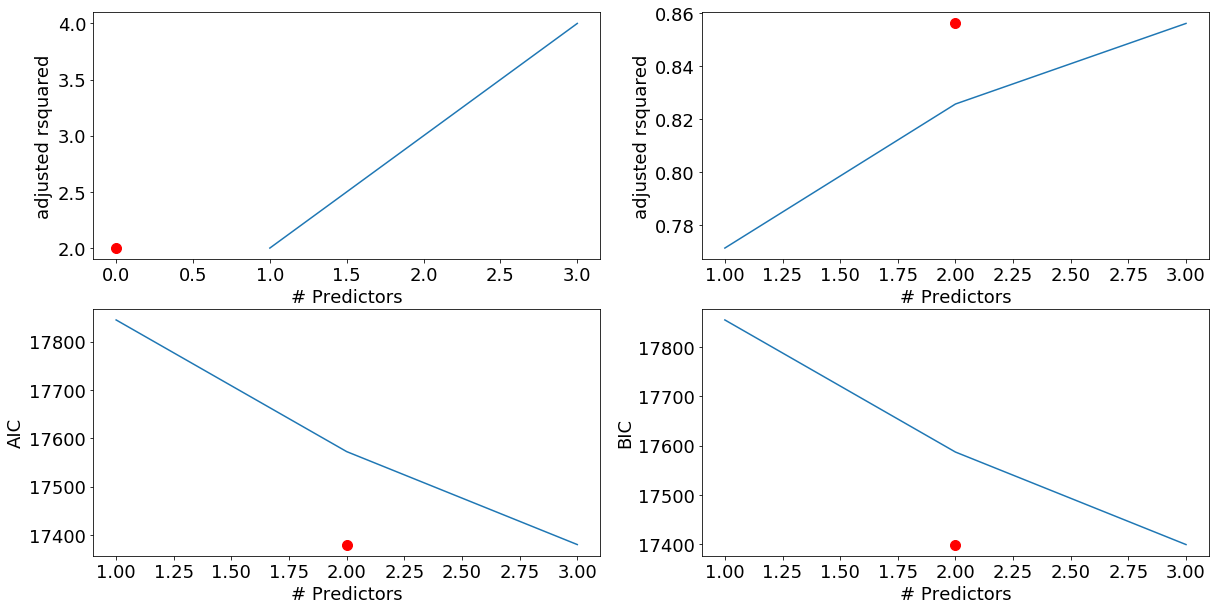

In [0]:
plt.figure(figsize=(20, 10))
plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

## Mallow Cp
plt.subplot(221)
Cp = models.apply(lambda row: (row[1].params.shape[0] + (row[1].mse_total - fitted_full_model.mse_total) * 
                              (train_x.shape[0] - row[1].params.shape[0])/fitted_full_model.mse_total), axis=1)
plt.plot(Cp)
plt.plot(Cp.argmin(), Cp.min(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

## adj-rsquared plot
## adj-rsquared = Explained variation / Total variation
adj_rsquared = models.apply(lambda row: row[1].rsquared_adj, axis=1)
plt.subplot(222)
plt.plot(adj_rsquared)
plt.plot(adj_rsquared.argmax(), adj_rsquared.max(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('adjusted rsquared')

## aic
aic = models.apply(lambda row: row[1].aic, axis=1)
plt.subplot(223)
plt.plot(aic)
plt.plot(aic.argmin(), aic.min(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('AIC')

## bic
bic = models.apply(lambda row: row[1].bic, axis=1)
plt.subplot(224)
plt.plot(bic)
plt.plot(bic.argmin(), bic.min(), 'or')
plt.xlabel('# Predictors')
plt.ylabel('BIC')

## 전진선택법

In [0]:
########전진선택법(step=1)

def forward(X, y, predictors):
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns.difference(['const']) if p not in predictors]
    tic = time.time()
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]+['const']))
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [0]:
#### 전진선택법 모델

def forward_model(X,y):
    Fmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    # 미리 정의된 데이터 변수
    predictors = []
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const'])) + 1):
        Forward_result = forward(X=X,y=y,predictors=predictors)
        if i > 1:
            if Forward_result['AIC'] > Fmodel_before:
                break
        Fmodels.loc[i] = Forward_result
        predictors = Fmodels.loc[i]["model"].model.exog_names
        Fmodel_before = Fmodels.loc[i]["AIC"]
        predictors = [ k for k in predictors if k != 'const']
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")

    return(Fmodels['model'][len(Fmodels['model'])])

In [0]:
Forward_best_model = forward_model(X=train_x, y=train_y)

Processed  36 models on 1 predictors in 0.04154610633850098
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a22e92650>
Processed  35 models on 2 predictors in 0.03845977783203125
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a2a317290>
Processed  34 models on 3 predictors in 0.03834891319274902
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a27ccccd0>
Processed  33 models on 4 predictors in 0.0379331111907959
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a28391650>
Processed  32 models on 5 predictors in 0.03835701942443848
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'Weight', 'KM', 'HP', 'co

In [0]:
Forward_best_model.aic

16944.115616747964

In [0]:
Forward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     417.4
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:20:27   Log-Likelihood:                -8447.1
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     980   BIC:                         1.707e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1014.6295    130.487      7.776      0.000     758.564    1270.695
Automatic_airco   2293.2207    197.801     11.594      0.000    1905.058    2681.383
Weight              11.6126      1.427      8.139      0.000       8.813      14.413
KM                  -0.0164      0.001    -12.084      0.000      -0.019      -0.014
HP                  53.1542      5.687      9.346      0.000      41.994      64.315
Powered_Windows    359.3754     86.860      4.137      0.000     188.922     529.829
cc                  -4.2765      0.549     -7.786      0.000      -5.354      -3.199
Quarterly_Tax       12.6616      1.946      6.505      0.000       8.842      16.481
CNG              -3494.3262    535.458     -6.526      0.000   -4545.101   -2443.551
Guarantee_Period    57.5917     13.998      4.114      0.000      30.123      85.061
BOVAG_Guarantee    468.6433    135.630      3.455      0.001     202.484     734.803
Age_08_04          -28.8853     10.781     -2.679      0.008     -50.042      -7.729
CD_Player          340.5649    102.543      3.321      0.001     139.337     541.793
Boardcomputer     -303.4344    122.030     -2.487      0.013    -542.905     -63.964
Petrol           -1762.9480    492.455     -3.580      0.000   -2729.336    -796.560
Mfr_Guarantee      246.4872     76.334      3.229      0.001      96.691     396.283
Airco              238.4787     89.315      2.670      0.008      63.208     413.749
Sport_Model        328.8915     90.903      3.618      0.000     150.505     507.278
ABS               -269.1981    106.978     -2.516      0.012    -479.131     -59.265
Automatic          428.0269    159.777      2.679      0.008     114.483     741.571
Backseat_Divider  -242.6236    120.409     -2.015      0.044    -478.912      -6.335
Metallic_Rim       167.0057     94.188      1.773      0.077     -17.828     351.839
Doors               79.4736     42.904      1.852      0.064      -4.721     163.669
Tow_Bar           -129.5692     79.483     -1.630      0.103    -285.546      26.407
Cylinders         -4.77e+05   6.15e+04     -7.757      0.000   -5.98e+05   -3.56e+05
const            -1.193e+05   1.54e+04     -7.757      0.000   -1.49e+05   -8.91e+04
==============================================================================
Omnibus:                      129.065   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1088.092
Skew:                          -0.242   Prob(JB):                    5.29e-237
Kurtosis:                       8.074   Cond. No.                     1.14e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.82e-20. 

## 후진소거법

In [0]:
######## 후진선택법(step=1)
def backward(X,y,predictors):
    tic = time.time()
    results = []
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)+['const']))
    models = pd.DataFrame(results)
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

In [0]:
# 후진 소거법 모델
def backward_model(X, y):
    Bmodels = pd.DataFrame(columns=["AIC", "model"], index = range(1,len(X.columns)))
    tic = time.time()
    predictors = X.columns.difference(['const'])
    Bmodel_before = processSubset(X,y,predictors)['AIC']
    while (len(predictors) > 1):
        Backward_result = backward(X=train_x, y= train_y, predictors = predictors)
        if Backward_result['AIC'] > Bmodel_before:
            break
        Bmodels.loc[len(predictors) - 1] = Backward_result
        predictors = Bmodels.loc[len(predictors) - 1]["model"].model.exog_names
        Bmodel_before = Backward_result['AIC']
        predictors = [ k for k in predictors if k != 'const']

    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Bmodels['model'].dropna().iloc[0])

In [0]:
Backward_best_model = backward_model(X=train_x,y=train_y)

Processed  36 models on 35 predictors in 0.08450198173522949
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Central_Lock', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mfg_Year', 'Mfr_Guarantee', 'Petrol', 'Power_Steering', 'Powered_Windows', 'Quarterly_Tax', 'Radio', 'Radio_cassette', 'Sport_Model', 'Tow_Bar', 'Weight', 'cc', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a290397d0>
Processed  35 models on 34 predictors in 0.08096981048583984
Selected predictors: ['ABS', 'Age_08_04', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic', 'Automatic_airco', 'BOVAG_Guarantee', 'Backseat_Divider', 'Boardcomputer', 'CD_Player', 'CNG', 'Cylinders', 'Diesel', 'Doors', 'Gears', 'Guarantee_Period', 'HP', 'KM', 'Met_Color', 'Metallic_Rim', 'Mfg_Month', 'Mf

In [0]:
Backward_best_model.aic

16944.115616747957

In [0]:
Backward_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     417.4
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:20:28   Log-Likelihood:                -8447.1
No. Observations:                1005   AIC:                         1.694e+04
Df Residuals:                     980   BIC:                         1.707e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -269.1981    106.978     -2.516      0.012    -479.131     -59.265
Age_08_04          -28.8853     10.781     -2.679      0.008     -50.042      -7.729
Airco              238.4787     89.315      2.670      0.008      63.208     413.749
Automatic          428.0269    159.777      2.679      0.008     114.483     741.571
Automatic_airco   2293.2207    197.801     11.594      0.000    1905.058    2681.383
BOVAG_Guarantee    468.6433    135.630      3.455      0.001     202.484     734.803
Backseat_Divider  -242.6236    120.409     -2.015      0.044    -478.912      -6.335
Boardcomputer     -303.4344    122.030     -2.487      0.013    -542.905     -63.964
CD_Player          340.5649    102.543      3.321      0.001     139.337     541.793
CNG              -4.076e+04   5039.906     -8.088      0.000   -5.07e+04   -3.09e+04
Cylinders        -4.682e+05   6.03e+04     -7.763      0.000   -5.87e+05    -3.5e+05
Diesel           -3.727e+04   5029.639     -7.409      0.000   -4.71e+04   -2.74e+04
Doors               79.4736     42.904      1.852      0.064      -4.721     163.669
Guarantee_Period    57.5917     13.998      4.114      0.000      30.123      85.061
HP                  53.1542      5.687      9.346      0.000      41.994      64.315
KM                  -0.0164      0.001    -12.084      0.000      -0.019      -0.014
Metallic_Rim       167.0057     94.188      1.773      0.077     -17.828     351.839
Mfg_Year          1014.6295    130.487      7.776      0.000     758.564    1270.695
Mfr_Guarantee      246.4872     76.334      3.229      0.001      96.691     396.283
Petrol           -3.903e+04   5032.561     -7.755      0.000   -4.89e+04   -2.92e+04
Powered_Windows    359.3754     86.860      4.137      0.000     188.922     529.829
Quarterly_Tax       12.6616      1.946      6.505      0.000       8.842      16.481
Sport_Model        328.8915     90.903      3.618      0.000     150.505     507.278
Tow_Bar           -129.5692     79.483     -1.630      0.103    -285.546      26.407
Weight              11.6126      1.427      8.139      0.000       8.813      14.413
cc                  -4.2765      0.549     -7.786      0.000      -5.354      -3.199
const            -1.171e+05   1.51e+04     -7.763      0.000   -1.47e+05   -8.75e+04
==============================================================================
Omnibus:                      129.065   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1088.092
Skew:                          -0.242   Prob(JB):                    5.29e-237
Kurtosis:                       8.074   Cond. No.                     1.32e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance m

## 단계적 선택법

In [0]:
def Stepwise_model(X, y):
    Stepmodels = pd.DataFrame(columns=['AIC', 'model'])
    tic = time.time()
    predictors = []
    Smodel_before = processSubset(X, y, predictors+['const'])['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns.difference(['const']))+1):
        Forward_result = forward(X=X, y=y, predictors=predictors)
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]['model'].model.exog_names
        predictors = [k for k in predictors if k != 'const']
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC'] < Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]['model'].model.exog_names
            Smodel_before = Stepmodels.loc[i]['AIC']
            predictors = [k for k in predictors if k != 'const']
            print('backward')
        if Stepmodels.loc[i]['AIC'] > Smodel_before: break
        else: Smodel_before = Stepmodels.loc[i]['AIC']
        
    toc = time.time()
    print('Total elapsed time:', (toc - tic), 'seconds')
    
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [0]:
Stepwise_best_model = Stepwise_model(X=X, y=y)

Processed  36 models on 1 predictors in 0.03668618202209473
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a28373e90>
forward
Processed  1 models on 0 predictors in 0.0019750595092773438
Selected predictors: ['const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a22e84fd0>
Processed  35 models on 2 predictors in 0.04244399070739746
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a299ad850>
forward
Processed  2 models on 1 predictors in 0.003893136978149414
Selected predictors: ['Mfg_Year', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a28457b90>
Processed  34 models on 3 predictors in 0.04018807411193848
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper 

Processed  16 models on 15 predictors in 0.03779315948486328
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'Metallic_Rim', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a2a3355d0>
Processed  20 models on 17 predictors in 0.04631781578063965
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Petrol', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'Metallic_Rim', 'ABS', 'Airco', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a299ad810>
forward
Processed  17 models on 16 predictors in 0.04151415824890137
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'P

Processed  13 models on 24 predictors in 0.03536272048950195
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'Metallic_Rim', 'ABS', 'Airco', 'Diesel', 'Mfg_Month', 'Automatic', 'Boardcomputer', 'CD_Player', 'cc', 'CNG', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a22e84fd0>
forward
Processed  24 models on 23 predictors in 0.07718992233276367
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'Metallic_Rim', 'ABS', 'Airco', 'Diesel', 'Mfg_Month', 'Automatic', 'Boardcomputer', 'CD_Player', 'cc', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a29a3a910>
backwar

Processed  24 models on 23 predictors in 0.04984927177429199
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'Metallic_Rim', 'ABS', 'Airco', 'Diesel', 'Mfg_Month', 'Automatic', 'Boardcomputer', 'CD_Player', 'cc', 'CNG', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a28a11c90>
backward
Processed  13 models on 24 predictors in 0.027450084686279297
Selected predictors: ['Mfg_Year', 'Automatic_airco', 'KM', 'Weight', 'HP', 'Powered_Windows', 'Quarterly_Tax', 'Guarantee_Period', 'BOVAG_Guarantee', 'Sport_Model', 'Tow_Bar', 'Mfr_Guarantee', 'Backseat_Divider', 'Metallic_Rim', 'ABS', 'Airco', 'Diesel', 'Mfg_Month', 'Automatic', 'Boardcomputer', 'CD_Player', 'cc', 'CNG', 'Cylinders', 'const']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x1a2a536650>
forwa

In [0]:
Stepwise_best_model.aic

24229.195698484626

In [0]:
Stepwise_best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     608.7
Date:                Fri, 24 Apr 2020   Prob (F-statistic):               0.00
Time:                        22:20:31   Log-Likelihood:                -12091.
No. Observations:                1436   AIC:                         2.423e+04
Df Residuals:                    1412   BIC:                         2.436e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Mfg_Year          1422.4066     40.330     35.269      0.000    1343.293    1501.520
Automatic_airco   2418.4800    157.138     15.391      0.000    2110.230    2726.730
KM                  -0.0163      0.001    -14.599      0.000      -0.018      -0.014
Weight              11.3668      1.047     10.857      0.000       9.313      13.421
HP                  19.0061      3.023      6.287      0.000      13.076      24.936
Powered_Windows    342.3198     73.550      4.654      0.000     198.040     486.600
Quarterly_Tax       14.4267      1.575      9.159      0.000      11.337      17.517
Guarantee_Period    66.4281     11.864      5.599      0.000      43.156      89.700
BOVAG_Guarantee    497.0693    110.651      4.492      0.000     280.012     714.127
Sport_Model        307.4723     73.520      4.182      0.000     163.253     451.692
Tow_Bar           -202.5525     67.671     -2.993      0.003    -335.300     -69.805
Mfr_Guarantee      225.5253     64.222      3.512      0.000      99.544     351.507
Backseat_Divider  -290.6908    103.011     -2.822      0.005    -492.762     -88.619
Metallic_Rim       198.6701     78.694      2.525      0.012      44.300     353.041
ABS               -297.4536     87.734     -3.390      0.001    -469.557    -125.350
Airco              191.3195     75.749      2.526      0.012      42.726     339.913
Diesel           -1211.5394    253.399     -4.781      0.000   -1708.619    -714.460
Mfg_Month           22.9327      9.007      2.546      0.011       5.265      40.601
Automatic          315.9247    132.939      2.376      0.018      55.146     576.704
Boardcomputer     -269.4259    102.935     -2.617      0.009    -471.349     -67.503
CD_Player          219.7123     85.235      2.578      0.010      52.511     386.914
cc                  -0.1116      0.077     -1.450      0.147      -0.263       0.039
CNG              -2167.8209    323.445     -6.702      0.000   -2802.305   -1533.337
const            -2.848e+06   8.04e+04    -35.437      0.000   -3.01e+06   -2.69e+06
==============================================================================
Omnibus:                      151.108   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.057
Skew:                           0.051   Prob(JB):                    1.27e-257
Kurtosis:                       7.445   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 성능평가 

### the number of params 

In [0]:
print(Forward_best_model.params.shape, Backward_best_model.params.shape, Stepwise_best_model.params.shape)

(26,) (27,) (24,)


### 모델에 의해 예측된/추정된 값 <-> test_y 

In [0]:
pred_y_full = fitted_full_model.predict(test_x)
pred_y_forward = Forward_best_model.predict(test_x[Forward_best_model.model.exog_names])
pred_y_backward = Backward_best_model.predict(test_x[Backward_best_model.model.exog_names])
pred_y_stepwise = Stepwise_best_model.predict(test_x[Stepwise_best_model.model.exog_names])

In [0]:
perf_mat = pd.DataFrame(columns=['ALL', 'FORWARD', 'BACKWARD', 'STEPWISE'],
                       index=['MSE', 'RMSE', 'MAE', 'MAPE'])

In [0]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_ture, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [0]:
from sklearn import metrics

In [0]:
# 성능지표
perf_mat.loc['MSE']['ALL'] = metrics.mean_squared_error(test_y,pred_y_full)
perf_mat.loc['MSE']['FORWARD'] = metrics.mean_squared_error(test_y,pred_y_forward)
perf_mat.loc['MSE']['BACKWARD'] = metrics.mean_squared_error(test_y,pred_y_backward)
perf_mat.loc['MSE']['STEPWISE'] = metrics.mean_squared_error(test_y,pred_y_stepwise)

perf_mat.loc['RMSE']['ALL'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_full))
perf_mat.loc['RMSE']['FORWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_forward))
perf_mat.loc['RMSE']['BACKWARD'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_backward))
perf_mat.loc['RMSE']['STEPWISE'] = np.sqrt(metrics.mean_squared_error(test_y, pred_y_stepwise))

perf_mat.loc['MAE']['ALL'] = metrics.mean_absolute_error(test_y, pred_y_full)
perf_mat.loc['MAE']['FORWARD'] = metrics.mean_absolute_error(test_y, pred_y_forward)
perf_mat.loc['MAE']['BACKWARD'] = metrics.mean_absolute_error(test_y, pred_y_backward)
perf_mat.loc['MAE']['STEPWISE'] = metrics.mean_absolute_error(test_y, pred_y_stepwise)

perf_mat.loc['MAPE']['ALL'] = mean_absolute_percentage_error(test_y, pred_y_full)
perf_mat.loc['MAPE']['FORWARD'] = mean_absolute_percentage_error(test_y, pred_y_forward)
perf_mat.loc['MAPE']['BACKWARD'] = mean_absolute_percentage_error(test_y, pred_y_backward)
perf_mat.loc['MAPE']['STEPWISE'] = mean_absolute_percentage_error(test_y, pred_y_stepwise)

print(perf_mat)

              ALL      FORWARD     BACKWARD     STEPWISE
MSE   9.81093e+06  9.89572e+06  9.89572e+06  1.10665e+06
RMSE      3132.24      3145.75      3145.75      1051.98
MAE        937.98      933.116      933.116      785.921
MAPE      8.74981      8.71124      8.71124      7.89523


In [0]:
print(len(fitted_full_model.params))
print(len(Forward_best_model.params))
print(len(Backward_best_model.params))
print(len(Stepwise_best_model.params))

37
26
27
24
